In [2]:
import pandas as pd
import numpy as np

from analyze_src.basic_data_inspection import DataInspector, DataTypesInspectionStrategy, SummaryStatisticsInspectionStrategy
from analyze_src.missing_values_analysis import SimpleMissingValuesAnalysis
from analyze_src.univariate_analysis import UnivariateAnalyzer, NumericalUnivariateAnalysis, CategoricalUnivariateAnalysis
from analyze_src.bivariate_analysis import BivariateAnalyzer, NumericalVsNumericalAnalysis, CategoricalVsNumericalAnalysis
from analyze_src.multivariate_analysis import SimpleMultivariateAnalysis

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
# Load the data
# Assuming you have already extracted the data into the 'extracted-data' folder

data_path = '../extracted_data/AmesHousing.csv'
df = pd.read_csv(data_path)

In [4]:
# step 1 :Basic Data Inspection 
#------------------------------------------
# initialize the Data Inspector with a strategy for Data Types Inspection 
data_inspector = DataInspector(strategy=DataTypesInspectionStrategy())
data_inspector.execute_inspection (df)


Data Types and Non-null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-n

In [5]:
df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [6]:
# switch strategy to Summary Statistics Inspection 
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection (df)


Summary Statistics (Numerical Features):
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026     


Missing Values Count by Column:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

Visualizing Missing Values...


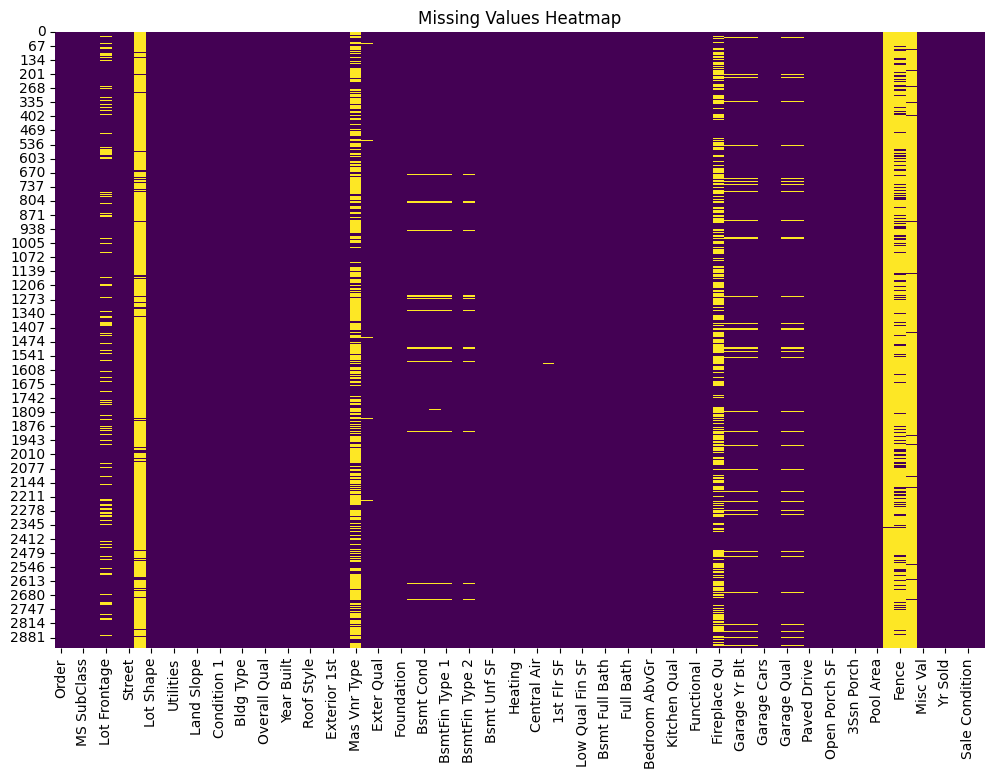

In [7]:
## Step 2: Missing Values Analysis
# ------------------------------------
# Perform Missing Values Analysis
missing_values_analyzer = SimpleMissingValuesAnalysis()
missing_values_analyzer.analyze(df)

# Missing Values Heatmap Insights

#### **1. Colors Represent Missingness:**
- **Yellow**: Represents missing values. The more yellow you see in a column, the more missing data is present in that particular feature.
- **Purple (or dark color)**: Represents non-missing values. Columns that are mostly purple indicate that most of the data is present for that feature.

#### **2. Identifying Columns with Missing Data:**
- Look for columns with significant amounts of yellow. These columns have a higher proportion of missing data.
  - For instance, in your heatmap, columns like `Lot Frontage`, `Mas Vnr Type`, `Mas Vnr Area`, `Garage Yr Blt`, and `Pool Area` have substantial yellow, indicating that these features have missing values.

#### **3. Understanding the Distribution of Missing Data:**
- **Randomly Distributed**: If the yellow marks are scattered without any noticeable pattern, it suggests that the missing data might be randomly distributed.
- **Structured Missingness**: If the yellow is clustered in certain rows or columns, it might indicate a non-random pattern of missingness. For example, entire rows or columns missing could suggest a data collection issue or that these features are not applicable in certain cases.

#### **4. Assessing the Severity:**
- Columns with more yellow indicate a higher proportion of missing values, which might pose a problem for model building. This could lead to biased or inaccurate models if not handled properly.
  - In your heatmap, some columns have little to no missing values, while others have substantial missingness. Decisions will need to be made on whether to impute, drop, or handle these features differently.

# Insights 


#### **1. Data Types and Non-null Counts:**
- The dataset contains **2930 entries** and **82 columns**.
- **Data Types**: There are 11 columns with `float64` data type, 28 columns with `int64` data type, and 43 columns with `object` data type.
  - **Numerical Features**: These include features like `Lot Frontage`, `Lot Area`, `Overall Qual`, `Year Built`, etc.
  - **Categorical Features**: Features like `MS Zoning`, `Street`, `Neighborhood`, `Bldg Type`, etc., are categorical.

#### **2. Summary Statistics:**
- **Numerical Features**:
  - The target variable `SalePrice` has a mean of **$180,796** with a standard deviation of **$79,886**, indicating a significant spread in house prices.
  - `Overall Qual` (quality of the house) ranges from **1 to 10**, with a mean of **6.09**, showing a relatively high quality on average.
  - `Year Built` ranges from **1872 to 2010**, indicating that the dataset includes both very old and relatively new houses.
  - `Lot Area` has a wide range, with some extreme outliers (maximum of **215,245 sq ft**), which might indicate large properties.
  - The distribution of `Gr Liv Area` (above ground living area) shows a mean of **1499 sq ft** with a wide range, which could significantly impact `SalePrice`.

- **Categorical Features**:
  - **Neighborhood** has **28 unique values**, with `NAmes` being the most common, suggesting some neighborhoods might dominate the dataset.
  - **MS Zoning** is mostly `RL` (residential low-density), with **7 unique zoning types**.
  - `Alley` has a high frequency of missing values (discussed below).
  - Several features related to basements, garages, and exterior quality vary significantly, which will be crucial in predicting `SalePrice`.

#### **3. Missing Values Analysis:**
- **Columns with Significant Missing Values**:
  - `Alley` has **2732 missing values** (93.4% missing), making it almost unusable without imputation or transformation.
  - `Pool QC` (pool quality) has **2917 missing values** (99.5% missing), indicating that very few houses have pools.
  - `Fence` has **2358 missing values** (80.5% missing), suggesting that many houses do not have a fence or it was not recorded.
  - `Misc Feature` has **2824 missing values** (96.4% missing), indicating that most houses do not have miscellaneous features, or they were not recorded.

- **Columns with Moderate Missing Values**:
  - `Garage Type`, `Garage Yr Blt`, `Garage Finish`, `Garage Qual`, `Garage Cond` each have **159 missing values** (~5.4%), likely corresponding to houses without garages.
  - `Bsmt Qual`, `Bsmt Cond`, `Bsmt Exposure`, `BsmtFin Type 1`, `BsmtFin Type 2` each have **around 80 missing values** (~2.7%), likely representing houses without basements.
  - `Mas Vnr Type` (masonry veneer type) has **1775 missing values** (~60.6%), and `Mas Vnr Area` has **23 missing values**. This might indicate many houses do not have masonry veneer.

- **Single Missing Values**:
  - Several features, such as `BsmtFin SF 1`, `Total Bsmt SF`, `Electrical`, `Garage Cars`, `Garage Area`, etc., have only one or two missing values, which can likely be imputed without much impact.

### **Issues to be Addressed Later**

1. **Handling Missing Data:**
   - **Significant Missing Values**: Columns like `Alley`, `Pool QC`, `Fence`, and `Misc Feature` have a very high percentage of missing data. Decisions need to be made whether to:
     - Drop these columns entirely, as they might not add significant value.
     - Impute missing values with a placeholder (e.g., "None" or "No Pool") to retain them in the analysis.
   - **Moderate Missing Values**: Features related to basements and garages will require careful handling. Missing values could be filled with "No Basement" or "No Garage" for categorical features, and zeros for numerical ones.
   - **Single Missing Values**: These can likely be filled with the mode or mean for categorical and numerical features, respectively.

2. **Outlier Detection and Handling**:
   - Features like `Lot Area`, `Gr Liv Area`, and `SalePrice` show a significant range, indicating potential outliers. These will need to be detected and handled appropriately to avoid skewing model predictions.

3. **Categorical Encoding**:
   - Categorical features like `Neighborhood`, `MS Zoning`, `Bldg Type`, and `Exterior 1st` have many unique values. Decisions need to be made on how to encode these (e.g., one-hot encoding, label encoding, or frequency encoding) based on their relationship with the target variable.

4. **Feature Engineering**:
   - Based on the insights, certain features might need to be engineered (e.g., combining related features, creating interaction terms, or transforming skewed features) to better capture the relationships in the data.

5. **Correlation and Multicollinearity**:
   - Initial correlation analysis suggests that some features might be highly correlated with each other (e.g., basement-related features). This could lead to multicollinearity issues, which need to be addressed during feature selection.

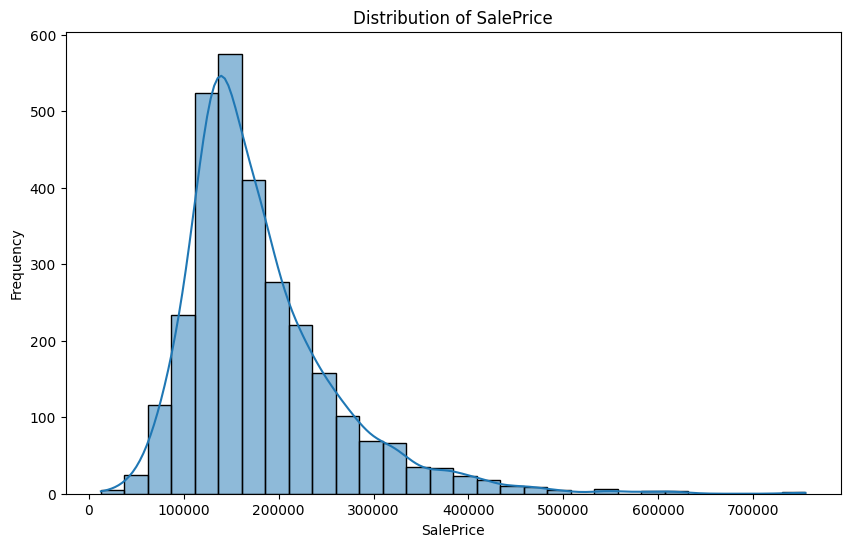

In [8]:
# Step 3: Univariate Analysis
# -----------------------------------
# Analyzing a Numerical Feature
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'SalePrice')

c:\Users\Admin\Desktop\End-to-End_Machine_Learning_Project\analysis\analyze_src\univariate_analysis.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette="muted")


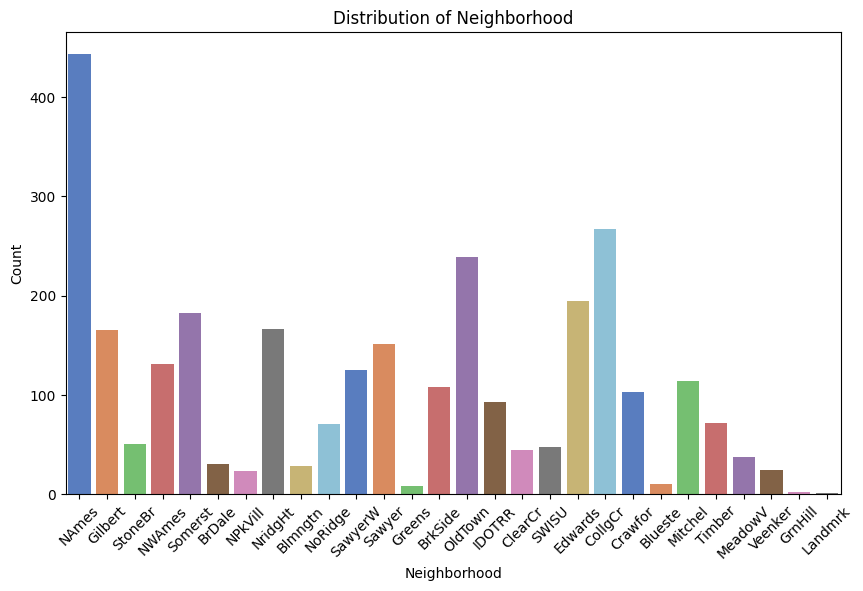

In [9]:
# Analyzing a Categorical Feature
univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, 'Neighborhood')

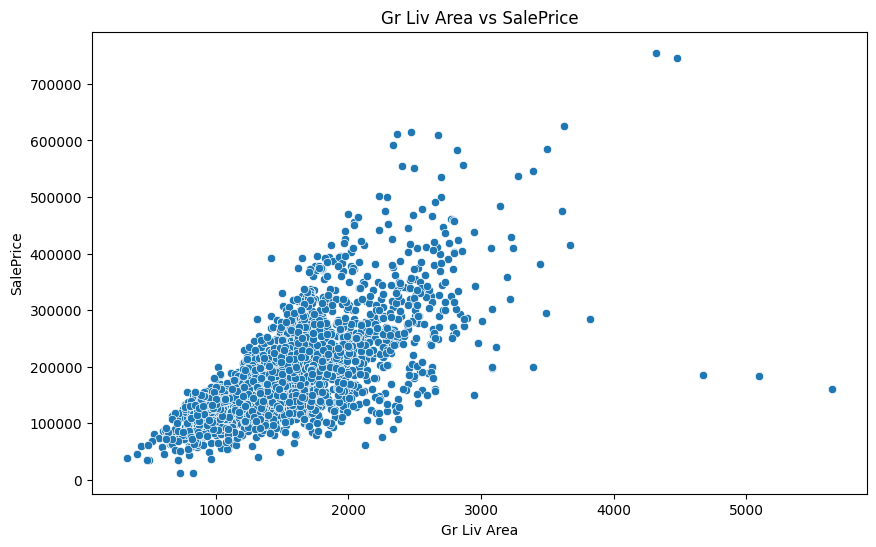

In [11]:
# Step 4: Bivariate Analysis
# -----------------------------------
# Analyzing the Relationship Between Two Numerical Features
bivariate_analyzer = BivariateAnalyzer(NumericalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Gr Liv Area', 'SalePrice')

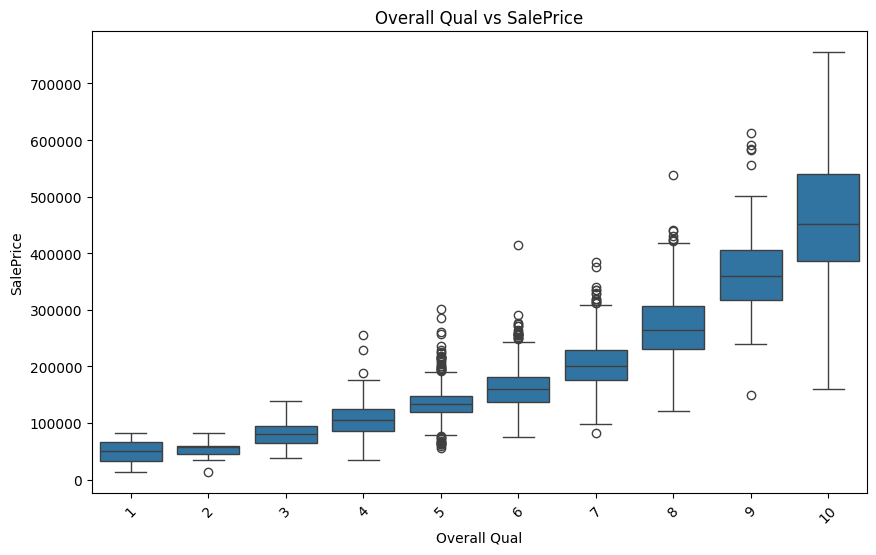

In [12]:
# Analyzing the Relationship Between a Categorical and a Numerical Feature
bivariate_analyzer.set_strategy(CategoricalVsNumericalAnalysis())
bivariate_analyzer.execute_analysis(df, 'Overall Qual', 'SalePrice')

### **Insights from Univariate and Bivariate Analysis**

#### **Step 3: Univariate Analysis**

1. **SalePrice Distribution (Numerical Feature)**:
   - **Insight**: The distribution of `SalePrice` is positively skewed, with the majority of house prices falling between $100,000 and $250,000. The peak frequency is around the $200,000 mark.
   - **Implication**: This skewness suggests that most homes in the dataset are relatively affordable, with fewer high-end properties. The long tail on the right side indicates a small number of more expensive homes, which may need special consideration during modeling (e.g., applying a log transformation to normalize the distribution).

2. **Neighborhood Distribution (Categorical Feature)**:
   - **Insight**: The `Neighborhood` feature shows a varied distribution, with `NAmes` being the most common neighborhood, followed by `CollgCr` and `OldTown`. Some neighborhoods have very few observations.
   - **Implication**: The high frequency of certain neighborhoods suggests that these areas could significantly influence overall housing prices. Neighborhoods with fewer observations might require careful handling to avoid overfitting during model training, potentially using techniques like frequency encoding or grouping similar neighborhoods together.

#### **Step 4: Bivariate Analysis**

1. **Gr Liv Area vs. SalePrice (Numerical vs. Numerical)**:
   - **Insight**: There is a strong positive correlation between `Gr Liv Area` (Above Ground Living Area) and `SalePrice`, indicating that larger homes generally sell for higher prices. The relationship appears mostly linear, but there are a few outliers, especially at higher `Gr Liv Area` values.
   - **Implication**: This linear relationship confirms that `Gr Liv Area` is likely a strong predictor of `SalePrice`. However, the presence of outliers (large homes with lower than expected prices) might require further investigation to determine whether they should be treated or removed.

2. **Overall Qual vs. SalePrice (Categorical vs. Numerical)**:
   - **Insight**: There is a clear positive relationship between `Overall Qual` (Overall Quality) and `SalePrice`, with higher quality ratings associated with significantly higher prices. The box plot shows increasing medians and ranges as quality improves, with some variability in each category.
   - **Implication**: `Overall Qual` is another strong predictor of `SalePrice`. The consistent increase in sale price with higher quality ratings suggests that homebuyers highly value quality. The variability within each category might be due to other factors influencing price, such as location or specific features not captured by `Overall Qual`.

### **Summary**:
- **Key Predictors**: Both `Gr Liv Area` and `Overall Qual` are strong predictors of `SalePrice`. These features should be emphasized in any predictive models.
- **Data Distribution**: The positive skew in `SalePrice` and the wide range of values for both `Gr Liv Area` and `Overall Qual` indicate the need for careful data preprocessing, including potential normalization or transformation of features.
- **Outliers**: Outliers in the relationship between `Gr Liv Area` and `SalePrice` need to be examined closely, as they may represent special cases (e.g., luxury homes) that could skew the model if not properly addressed.